In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spams
import cv2
from stainStrandarzation import utils
from stainStrandarzation.Vahadane import vahadane
from sklearn.manifold import TSNE

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
source = "C:\dataset\Ovarian_After_Split\Efficient\\227953H_17_4.png"
target = "D:\\Dataset\\test\\Efficient\\120099_5_4.png"
RESULT_PATH = './120099_5_4_i1.png'

source image size:  (1000, 1000, 3)
target image size:  (1000, 1000, 3)


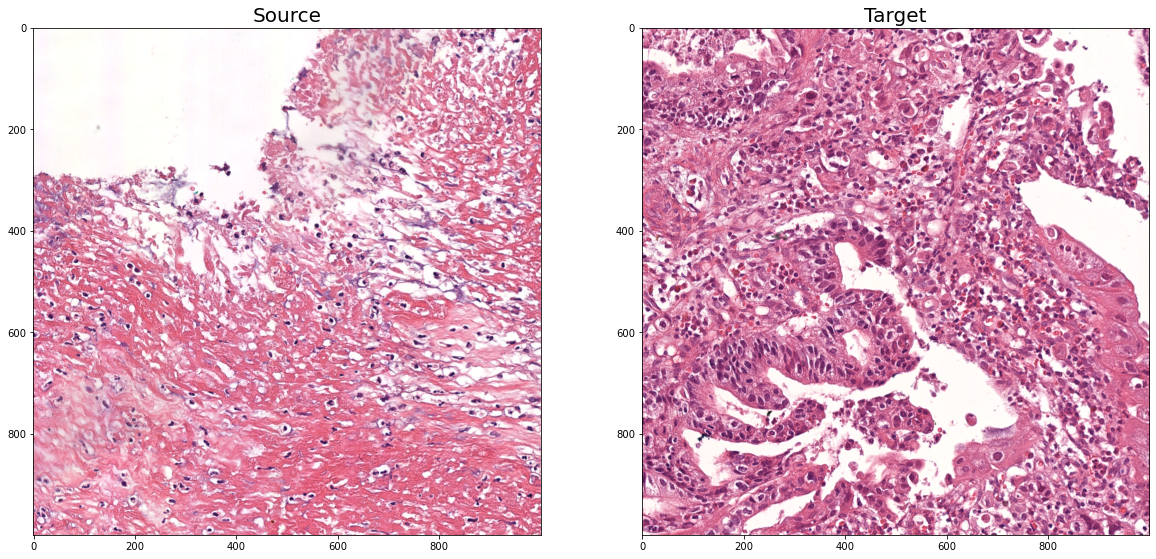

In [3]:
source_image = utils.read_image(source)
target_image = utils.read_image(target)
print('source image size: ', source_image.shape)
print('target image size: ', target_image.shape)
plt.figure(figsize=(20.0, 20.0))
plt.subplot(1, 2, 1)
plt.title('Source', fontsize=20)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.title('Target', fontsize=20)
plt.imshow(target_image)
plt.show()

In [4]:
vhd = vahadane(LAMBDA1=0.01, LAMBDA2=0.01, fast_mode=1, getH_mode=0, ITER=50)
vhd.show_config()

STAIN_NUM = 2
THRESH = 0.9
LAMBDA1 = 0.01
LAMBDA2 = 0.01
ITER = 50
fast_mode = 1
getH_mode = 0


In [ ]:
Ws, Hs = vhd.stain_separate(source_image)
vhd.fast_mode=0;vhd.getH_mode=0
Wt, Ht = vhd.stain_separate(target_image)

In [ ]:
img = vhd.SPCN(source_image, Ws, Hs, Wt, Ht)
plt.figure(figsize=(20.0, 10.0))
plt.title('Result', fontsize=20)
plt.imshow(img)
plt.show()
cv2.imwrite(RESULT_PATH, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

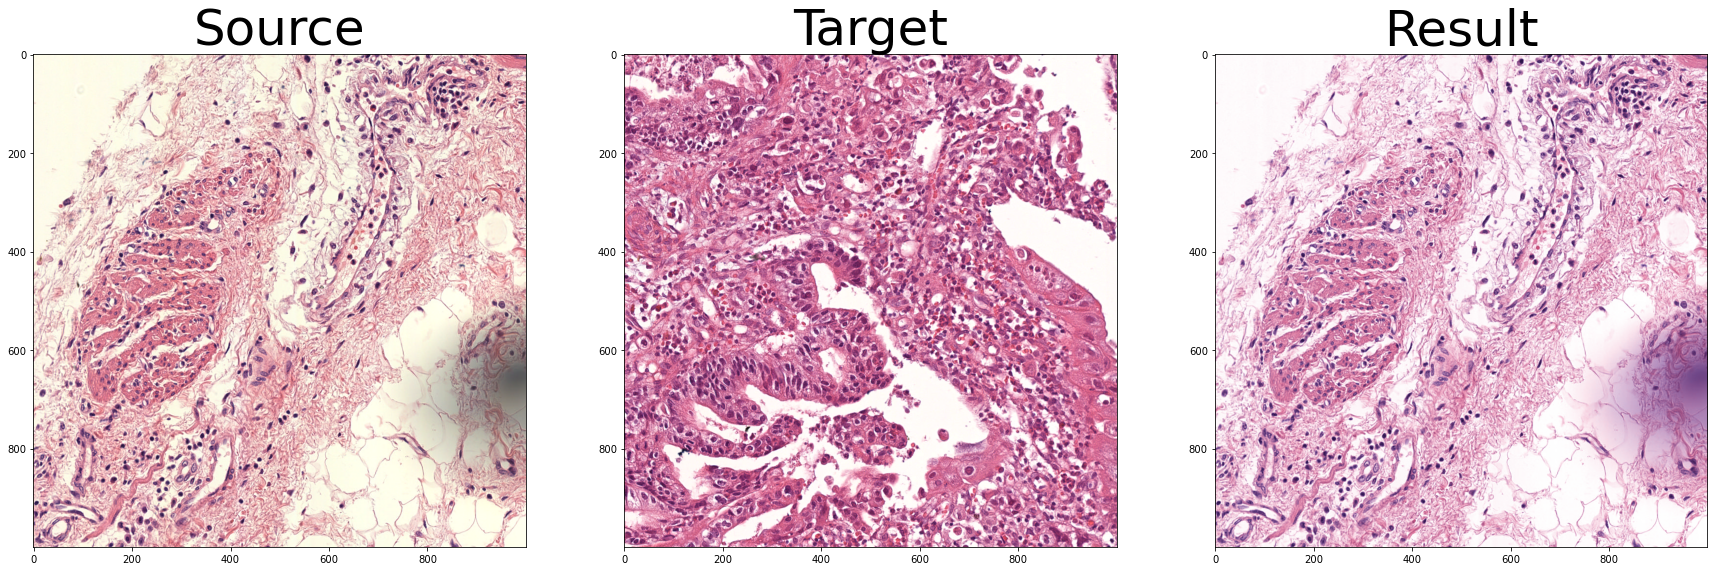

In [21]:
plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.title('Source', fontsize=50)
plt.imshow(source_image)
plt.subplot(1,3,2)
plt.title('Target', fontsize=50)
plt.imshow(target_image)
plt.subplot(1,3,3)
plt.title('Result', fontsize=50)
plt.imshow(img)
plt.savefig(RESULT_PATH)
plt.show()